# Machine Learning:  Clustering
### Unsupervised technique

# Used for
#### Customer Segmentation and Profiling
#### Outliers/ Fraud detection
#### Sub grouping for Classification and Regression

# Context

## Business Undertanding:
#### Our client is a haulage business. They want to group their drivers based on the distance covered and how often they go over their speed limit.
#### They want to understand the risk drivers pose to the business

In [1]:
# Import the Libraries required for the project

# these modules are for data management, preparation and analysis
import pandas as pd
import numpy as np

#these modules are for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# this is the clustering algorithm
from sklearn.cluster import KMeans
import sklearn

In [2]:
# Import the data required
haulage_df = pd.read_csv('data_1024.csv')
haulage_df.head()

,Driver_ID Distance_Feature Speeding_Feature
0,3423311935\t71.24\t28.0
1,3423313212\t52.53\t25.0
2,3423313724\t64.54\t27.0
3,3423311373\t55.69\t22.0
4,3423310999\t54.58\t25.0


In [3]:
# the data is actually data delimited
# \t 
# we need to pass the separator to read_csv
haulage_df= pd.read_csv('data_1024.csv',sep='\t')
haulage_df.head()

,Driver_ID,Distance_Feature,Speeding_Feature
0,3423311935,71.24,28.0
1,3423313212,52.53,25.0
2,3423313724,64.54,27.0
3,3423311373,55.69,22.0
4,3423310999,54.58,25.0


In [3]:
haulage_df.shape

(4000, 1)

In [4]:
#Check for missing data
haulage_df.isnull().sum()

Driver_ID\tDistance_Feature\tSpeeding_Feature    0
dtype: int64

In [6]:
# Check for duplicates
haulage_df.duplicated().sum()

0

In [7]:
haulage = haulage_df

In [8]:
haulage.head()

,Driver_ID,Distance_Feature,Speeding_Feature
0,3423311935,71.24,28.0
1,3423313212,52.53,25.0
2,3423313724,64.54,27.0
3,3423311373,55.69,22.0
4,3423310999,54.58,25.0


In [9]:
haulage.tail()

,Driver_ID,Distance_Feature,Speeding_Feature
3995,3423310685,160.04,10.0
3996,3423312600,176.17,5.0
3997,3423312921,170.91,12.0
3998,3423313630,176.14,5.0
3999,3423311533,168.03,9.0


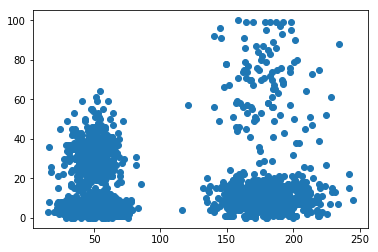

In [10]:
plt.scatter(haulage[['Distance_Feature']],
            haulage[['Speeding_Feature']])
plt.show()

In [11]:
# data to be used for clustering should be converted to a matrix
# based on the number of dimensions in the data

X = np.matrix(haulage[['Distance_Feature', 'Speeding_Feature']])
X

matrix([[ 71.24,  28.  ],
        [ 52.53,  25.  ],
        [ 64.54,  27.  ],
        ...,
        [170.91,  12.  ],
        [176.14,   5.  ],
        [168.03,   9.  ]])

In [12]:
type(X)

numpy.matrixlib.defmatrix.matrix

In [13]:
#help(KMeans)

In [43]:
# initialise the algoriythm

kmean_alg = KMeans(n_clusters=4 )
kmean_alg.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [45]:
# to identify the segment each driver falls into 

segment_num = kmean_alg.predict(haulage[['Distance_Feature',
                                         'Speeding_Feature']])

In [46]:
segment_num

array([0, 0, 0, ..., 1, 1, 1])

In [47]:
haulage['Driver_Segment'] = segment_num

In [48]:
haulage.sample(10)

,Driver_ID,Distance_Feature,Speeding_Feature,Driver_Segment,clusters
2234,3423310604,71.30,8.0,2,6
1462,3423313099,42.03,4.0,2,8
458,3423312858,64.66,24.0,0,4
2656,3423313286,57.89,6.0,2,8
3969,3423313327,192.21,8.0,1,8
1086,3423314419,45.20,6.0,2,3
3569,3423313836,160.49,6.0,1,0
3105,3423312947,66.86,6.0,2,4
3236,3423312723,190.97,76.0,3,4
1887,3423313350,51.15,6.0,2,8


In [49]:
centroid = kmean_alg.cluster_centers_

In [50]:
centroid

array([[ 50.46127059,  32.42823529],
       [180.34311782,  10.52011494],
       [ 49.98428468,   5.21441441],
       [177.83509615,  70.28846154]])

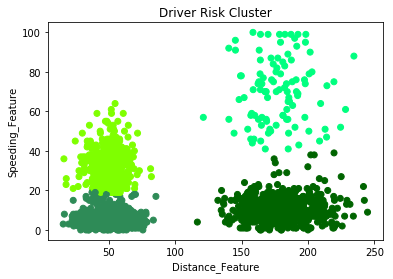

In [51]:
colormap = np.array(  ['chartreuse', 'darkgreen', 
                       'seagreen','springgreen', 'Grey', 'Purple',
                       'Orange', 'Violet', 'indigo', 'Black', 'Silver'] )

plt.scatter(haulage['Distance_Feature'], haulage['Speeding_Feature'],
            c = colormap[segment_num])
plt.xlabel('Distance_Feature')
plt.ylabel('Speeding_Feature')
plt.title('Driver Risk Cluster')
plt.show()

In [69]:
#help(plt.scatter)

In [52]:
haulage.groupby('Driver_Segment').count()

,Driver_ID,Distance_Feature,Speeding_Feature,clusters
Driver_Segment,,,,
0,425,425,425,425
1,696,696,696,696
2,2775,2775,2775,2775
3,104,104,104,104


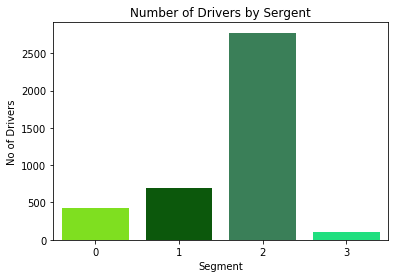

In [53]:
sns.countplot(haulage['Driver_Segment'],palette = colormap)
plt.xlabel('Segment')
plt.ylabel('No of Drivers')
plt.title('Number of Drivers by Sergent')
plt.show()

In [41]:
# to identify the drivers with the high risk
haulage.loc[haulage.Driver_Segment == 2].head()

,Driver_ID,Distance_Feature,Speeding_Feature,Driver_Segment
3200,3423314190,179.22,95.0,2
3201,3423314144,192.34,69.0,2
3202,3423314442,140.25,92.0,2
3203,3423313001,184.28,70.0,2
3204,3423311047,200.58,50.0,2


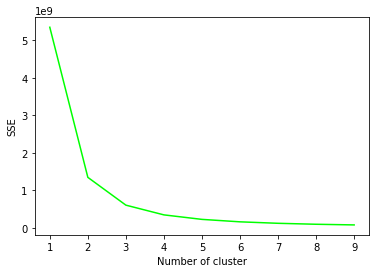

In [42]:
# Elbow graph
# Helps determine the best number of clusters

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(haulage)
    haulage["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), color="lime")
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()